# Coursera/IBM Supervised Learning: Regression
Kaggle Dataset (https://www.kaggle.com/mirichoi0218/insurance)

Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
   * The model will focus on both predicting the charges and being able to address the magnitude of the features, hence interpretabilty.

Brief description of the data set you chose and a summary of its attributes.
   * The data provided from Kaggle, referenced above, was tidy. Thus, no cleaning was needed. Furthermore, many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

    * **age:** Age of primary beneficiary.
    * **sex:** Insurance contractor gender: Female or Male.
    * **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    * **children:** Number of children covered by health insurance / Number of dependents.
    * **smoker:** Insurance contractor smoker: Yes or No.
    * **region:** The beneficiary's residential area in the US: Northeast, Southeast, Southwest, or Northwest.

Brief summary of data exploration and actions taken for data cleaning and feature engineering.
   * As aforementioned the data did not need cleaning, however in terms of feature engineering: 
       * Applied the natural log to the right skewed distribution of charges graph.
       * Looked at the charges by region.
       * Looked at sex, smoking, and having children by region.
       * Analyzed medical charges by age, bmi, and children according to the smoking factor. 
       * Converted objects labels (Sex, Smoker, and Region) into categorical.
       * Converted category labels (Sex, Smoker, and Region) into numerical using LabelEncoder.

Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
   * The baseline linear regression model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**.
   * The OLS model resulted in a R^2 Train Score: 0.7123 & **R^2 Test Score: 0.7570**.
   * The Ridge model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**. 
   * The Lasso model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**.
   * The 3rd degree Polynomial model resulted in a R^2 Train Score: 0.8415 & **R^2 Test Score: 0.8690**.
   

A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
   * The best regression model was the 3rd degree **Polynomial Regression model** with an **R^2 test score of 0.8670**. The 1st degree polynomial regression was an underfit model, high bias and low variance. While the 3rd degree polynomial regression was an overfit model, low bias and high variance. Moreover, the Training Root Mean Squared Error: 4781.9091 & the Testing Rooot Mean Squared Error: 4508.7727.

Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
   * In conclusion smoking is the greatest factor that affects medical cost charges, followed by children and bmi, respectively. Moreover, the Polynomial Regression model turned out to be the best model.
   
Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.
   * In order to further analyze this data I would like to implement different machine learning models such as; Logistic Regression and Random Forest. Moreover, I would like to gather more information from these beneficiaries if possible.

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# There are 0 missing values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

Text(0.5, 1.0, 'Distribution of Charges')

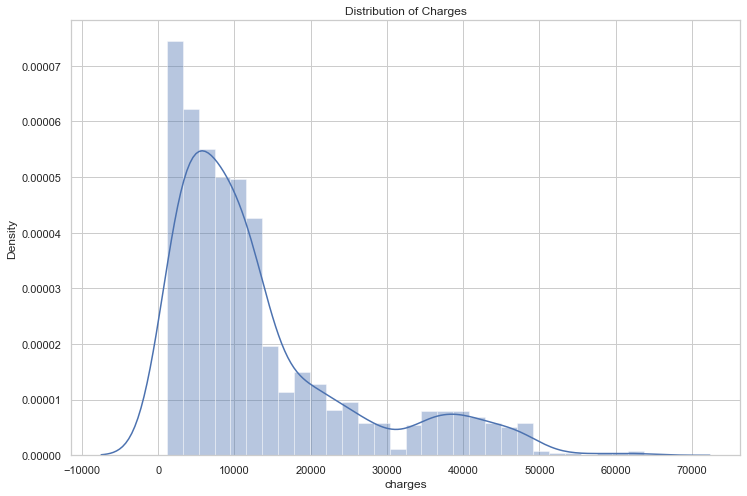

In [7]:
sns.set(style='whitegrid')
plt.subplots(1,1, figsize=(12, 8))
sns.distplot(df['charges'], kde = True, color = 'b')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal I will apply the natural log.

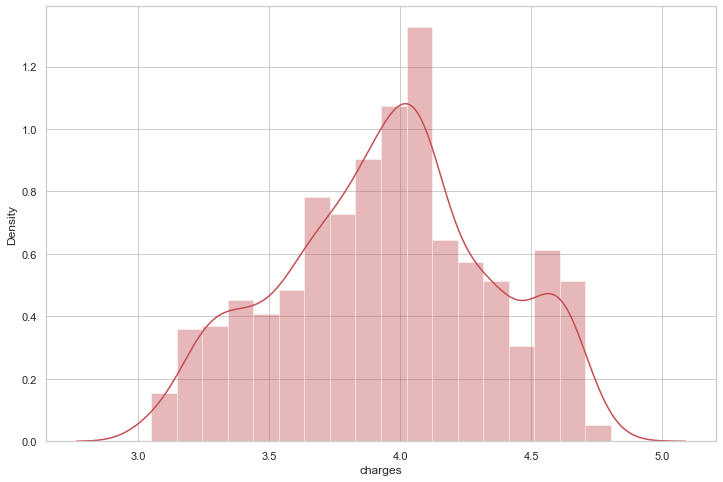

In [8]:
plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Now let's look at the charges by region.

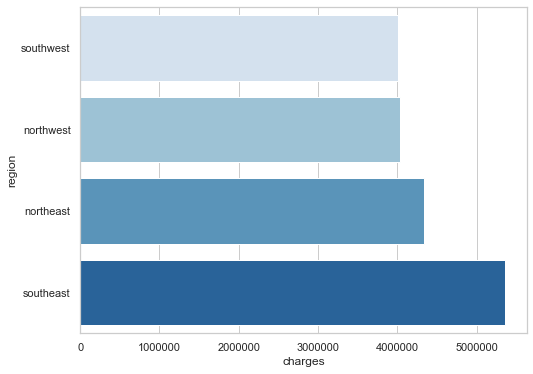

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(charges.head(), charges.head().index, palette='Blues')

The highest medical charges are in the Southeast and the lowest are in the Southwest. 
Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

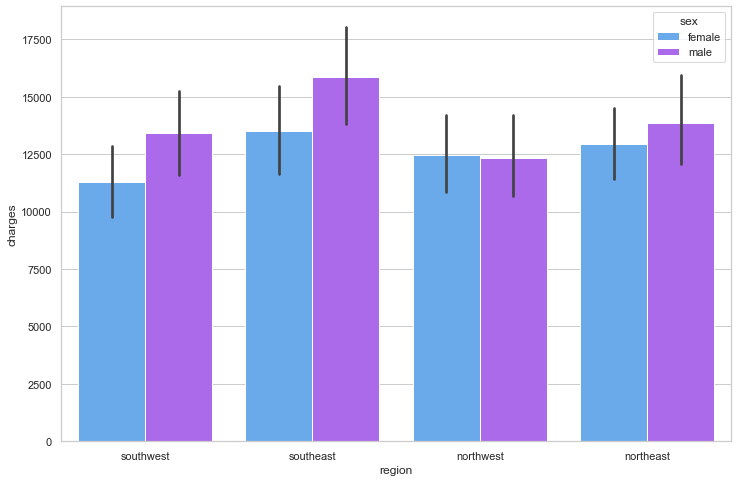

In [10]:
plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

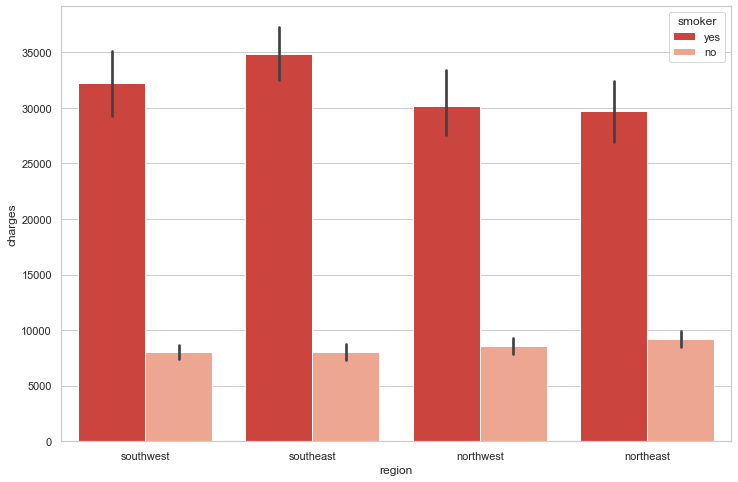

In [11]:
plt.subplots(1,1, figsize=(12,8))
sns.barplot(x = 'region', y = 'charges',
            hue='smoker', data=df, palette='Reds_r')

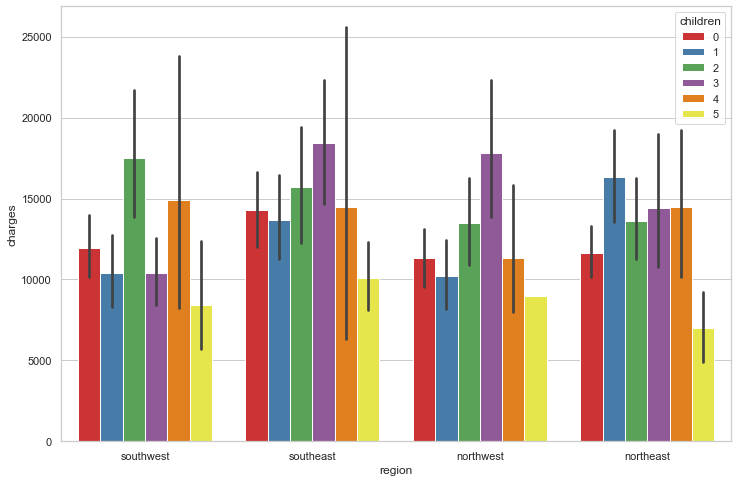

In [12]:
plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

Now let's analyze the medical charges by age, bmi, and children according to the smoking factor.

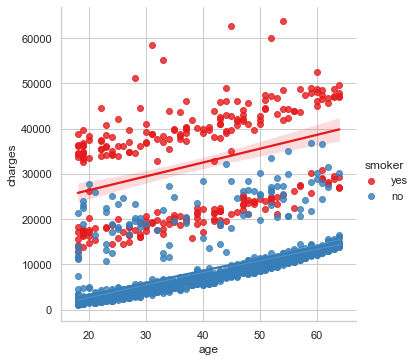

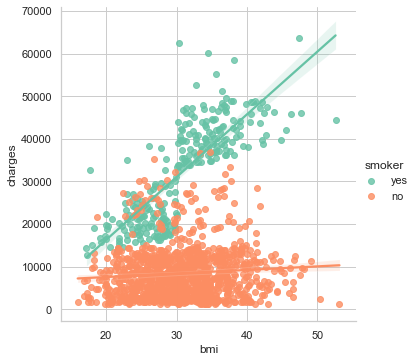

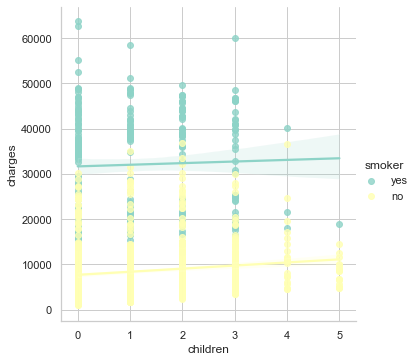

In [13]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs; even though the costs are growing with age, bmi, and children. Also people who have children generally smoke less, which the following violinplots shows as well.

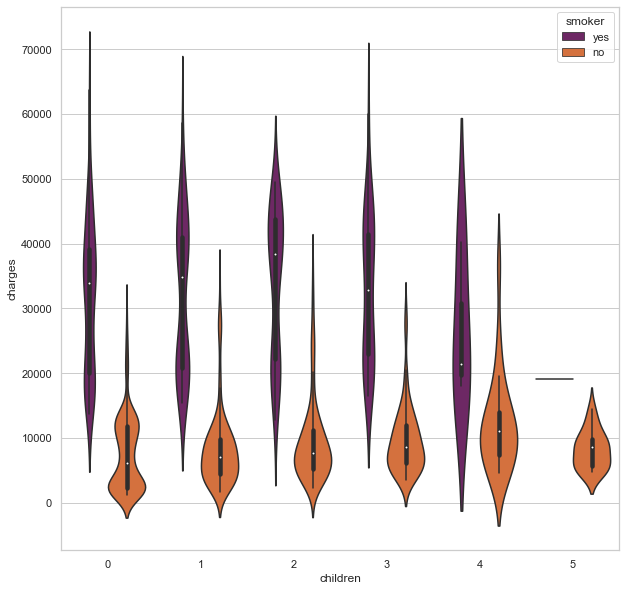

In [14]:
plt.subplots(1, 1, figsize=(10, 10))
sns.violinplot(x = 'children', y = 'charges', data=df,
               orient='v', hue='smoker', palette='inferno')

In [15]:
# Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
# Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())

df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())

df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())

df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

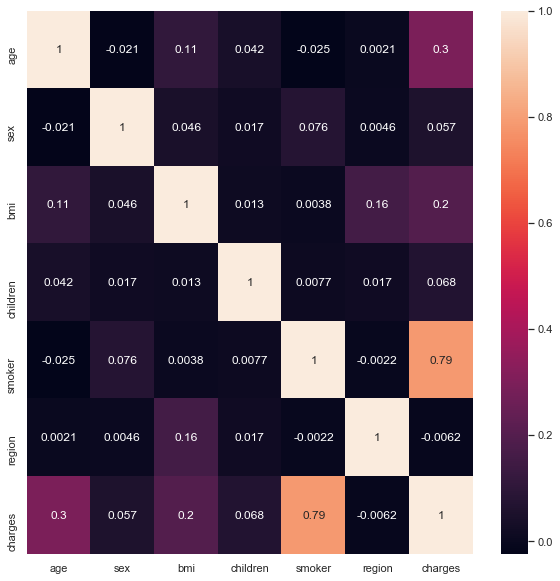

In [17]:
plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

No significant correlations, except for smoker feature.

## Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test, y_test))

-11946.606567263048
[ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
0.7833463107364539


In [19]:
y_train_pred_lr = Lin_reg.predict(X_train)
y_pred_lr = Lin_reg.predict(X_test)

train_rmse_lr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))

print('Training Root Mean Squared Error:' , train_rmse_lr)
print("Testing Rooot Mean Squared Error:" , test_rmse_lr)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_lr)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_lr))

Training Root Mean Squared Error: 6105.789320191615
Testing Rooot Mean Squared Error: 5799.587091438356
R^2 Train Score: 0.7417049283233981
R^2 Test Score: 0.7833463107364539


In [20]:
# Predicting the charges
# Comparing the actual output values with the predicted values
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_lr

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008
...,...,...
109,47055.53210,39116.968669
575,12222.89830,11814.555568
535,6067.12675,7638.107736
543,63770.42801,40959.081722


The baseline result was good, but improvements can be made by reducing unimportant features.

# OLS

In [21]:
import statsmodels.api as stats
model = stats.OLS(y_train, X_train)
ols = model.fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1200.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:30:27   Log-Likelihood:                         -10903.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1064   BIC:                                  2.185e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
y_train_pred_ols = ols.predict(X_train)
y_pred_ols = ols.predict(X_test)

train_rmse_ols = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ols))
test_rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols))

print('Training Root Mean Squared Error:' , train_rmse_ols)
print("Testing Rooot Mean Squared Error:" , test_rmse_ols)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_ols)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_ols))

Training Root Mean Squared Error: 6443.398770567204
Testing Rooot Mean Squared Error: 6142.028799493614
R^2 Train Score: 0.7123512376362529
R^2 Test Score: 0.7570059516022006


In [23]:
# Predicting the charges
# Comparing the actual output values with the predicted values
df_ols = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ols})
df_ols

,Actual,Predicted
764,9095.06825,10955.856940
887,5272.17580,8591.720285
890,29330.98315,37180.579963
1293,9301.89355,10260.046289
259,33750.29180,27759.648979
...,...,...
109,47055.53210,36344.760268
575,12222.89830,12843.414675
535,6067.12675,8846.285607
543,63770.42801,35952.836541


## Ridge Regression 

In [24]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.001, fit_intercept=True, normalize=False, random_state=42)
Ridge.fit(X_train, y_train)

y_train_pred_ridge = Ridge.predict(X_train)
y_pred_ridge = Ridge.predict(X_test)

train_rmse_ridge = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('Training Root Mean Squared Error:' , train_rmse_ridge)
print("Testing Rooot Mean Squared Error:" , test_rmse_ridge)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_ridge)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_ridge))

Training Root Mean Squared Error: 6105.789320438454
Testing Rooot Mean Squared Error: 5799.590353421407
R^2 Train Score: 0.7417049283025138
R^2 Test Score: 0.783346067022255


In [25]:
# Predicting the charges
# Comparing the actual output values with the predicted values
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
df_ridge

,Actual,Predicted
764,9095.06825,8924.430756
887,5272.17580,7116.319338
890,29330.98315,36908.895655
1293,9301.89355,9507.906077
259,33750.29180,27013.249268
...,...,...
109,47055.53210,39116.858732
575,12222.89830,11814.575330
535,6067.12675,7638.140081
543,63770.42801,40958.965983


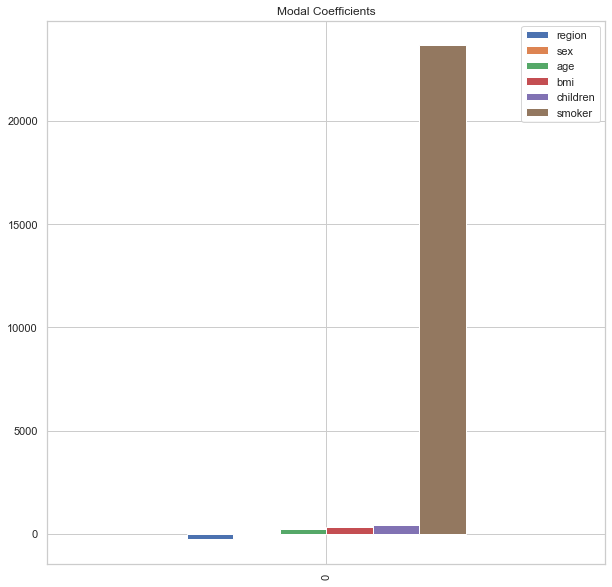

In [26]:
ridge_coef01 = pd.DataFrame(data=Ridge.coef_).T
ridge_coef01.columns = X_train.columns
ridge_coef01 = ridge_coef01.T.sort_values(by=0).T
ridge_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=False, random_state=42)

Lasso.fit(X_train, y_train)

y_train_pred_lasso = Lasso.predict(X_train)
y_pred_lasso = Lasso.predict(X_test)
train_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('Training Root Mean Squared Error:' , train_rmse_lasso)
print("Testing Rooot Mean Squared Error:" , test_rmse_lasso)

# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_lasso)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_lasso))

Training Root Mean Squared Error: 6105.789320192639
Testing Rooot Mean Squared Error: 5799.58744633592
R^2 Train Score: 0.7417049283233114
R^2 Test Score: 0.7833462842208183


In [28]:
# Predicting the charges
# Comparing the actual output values with the predicted values
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
df_lasso

,Actual,Predicted
764,9095.06825,8924.404696
887,5272.17580,7116.294427
890,29330.98315,36909.006482
1293,9301.89355,9507.876740
259,33750.29180,27013.347373
...,...,...
109,47055.53210,39116.966446
575,12222.89830,11814.555020
535,6067.12675,7638.110168
543,63770.42801,40959.074365


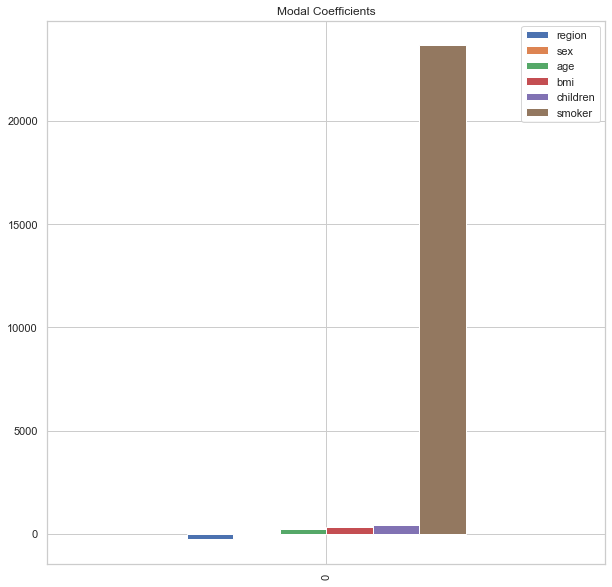

In [29]:
lasso_coef01 = pd.DataFrame(data=Lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

## Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures

X = df.drop(['charges', 'sex', 'region'], axis=1)
y = df.charges

pol = PolynomialFeatures (degree = 3)

X_pol = pol.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.20, random_state=42)

Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)

y_train_pred_plr = Pol_reg.predict(X_train)
y_test_pred_plr = Pol_reg.predict(X_test)

print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(X_test, y_test))

34288.949821339884
[ 3.15464039e-07 -4.99528746e+01 -3.41482037e+03  5.90926806e+03
 -1.24245357e+04  5.05325736e+00  4.65623016e+00 -2.46091361e+02
  2.44947375e+01  1.10673636e+02  4.15759857e+01  1.27441657e+03
 -7.49957293e+02 -5.72818911e+02 -1.24245357e+04 -3.26821468e-02
  4.68016415e-02  2.11634627e+00 -3.45467953e+00 -1.74142394e-01
  1.41208405e+00  7.02992932e+00  8.56161155e+00  1.04997464e+01
  2.44947375e+01 -1.10286704e+00 -1.38494598e+00 -2.10765215e+01
 -3.07716685e-01 -3.23811939e+01  1.27441657e+03  5.28380416e+01
  4.05878013e+02 -5.72818911e+02 -1.24245357e+04]
0.8690550878813432


In [31]:
# Evaluating the performance of the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_plr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_plr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_plr)))

Mean Absolute Error: 2745.538146157703
Mean Squared Error: 20329031.50172321
Root Mean Squared Error: 4508.772726776458


In [32]:
train_rmse_plr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_plr))
test_rmse_plr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_plr))

print('Training Root Mean Squared Error:' , train_rmse_plr)
print("Testing Rooot Mean Squared Error:" , test_rmse_plr)

# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_plr)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_test_pred_plr))

Training Root Mean Squared Error: 4781.909147452257
Testing Rooot Mean Squared Error: 4508.772726776458
R^2 Train Score: 0.8415708357607841
R^2 Test Score: 0.8690550878813433


In [33]:
# Predicting the charges
# Comparing the actual output values with the predicted values
df_plr = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_plr})
df_plr

,Actual,Predicted
764,9095.06825,9279.796983
887,5272.17580,6107.265474
890,29330.98315,32187.304034
1293,9301.89355,9704.430992
259,33750.29180,29384.071123
...,...,...
109,47055.53210,46254.120517
575,12222.89830,12972.531736
535,6067.12675,7312.001844
543,63770.42801,54536.136234
